In [1]:
# pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Visualizaciones
# -----------------------------------------------------------------------
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Funciones
import sys
sys.path.append('src') #pongo los 2 puntos para que salga de la carpeta
import src.funciones as f
import src.soporte_prep as spp
import src.soporte_sarima as sa



# Analisis Exploratorio Series Temporales
# -----------------------------------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Modelo Series Temporales
# -----------------------------------------------------------------------
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product


# Otros
# -----------------------------------------------------------------------
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv('datos/ventas (1).csv', parse_dates=True)

In [5]:
df.head()

,Date,Sales,Ad_Spend
0,2010-01-31,433.115028,1067.578108
1,2010-02-28,675.959666,1101.019690
2,2010-03-31,603.266058,1038.024057
3,2010-04-30,564.978439,964.110814
4,2010-05-31,714.413107,1036.700556


In [7]:
analisis_st = sa.TimeSeriesAnalysis(df, temporal_column="Date", value_column="Sales")


In [8]:
analisis_st.exploracion_datos()

El número de filas es 60 y el número de columnas es 2

----------

No hay duplicados

----------

No hay valores nulos

----------

Estadísticas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Sales,60.0,969.236018,297.501022,433.115028,742.549084,950.641203,1147.335291,1738.473961
Ad_Spend,60.0,1298.487917,213.402806,964.110814,1137.969399,1273.967577,1383.773075,1892.370418


In [9]:
analisis_st.graficar_serie()

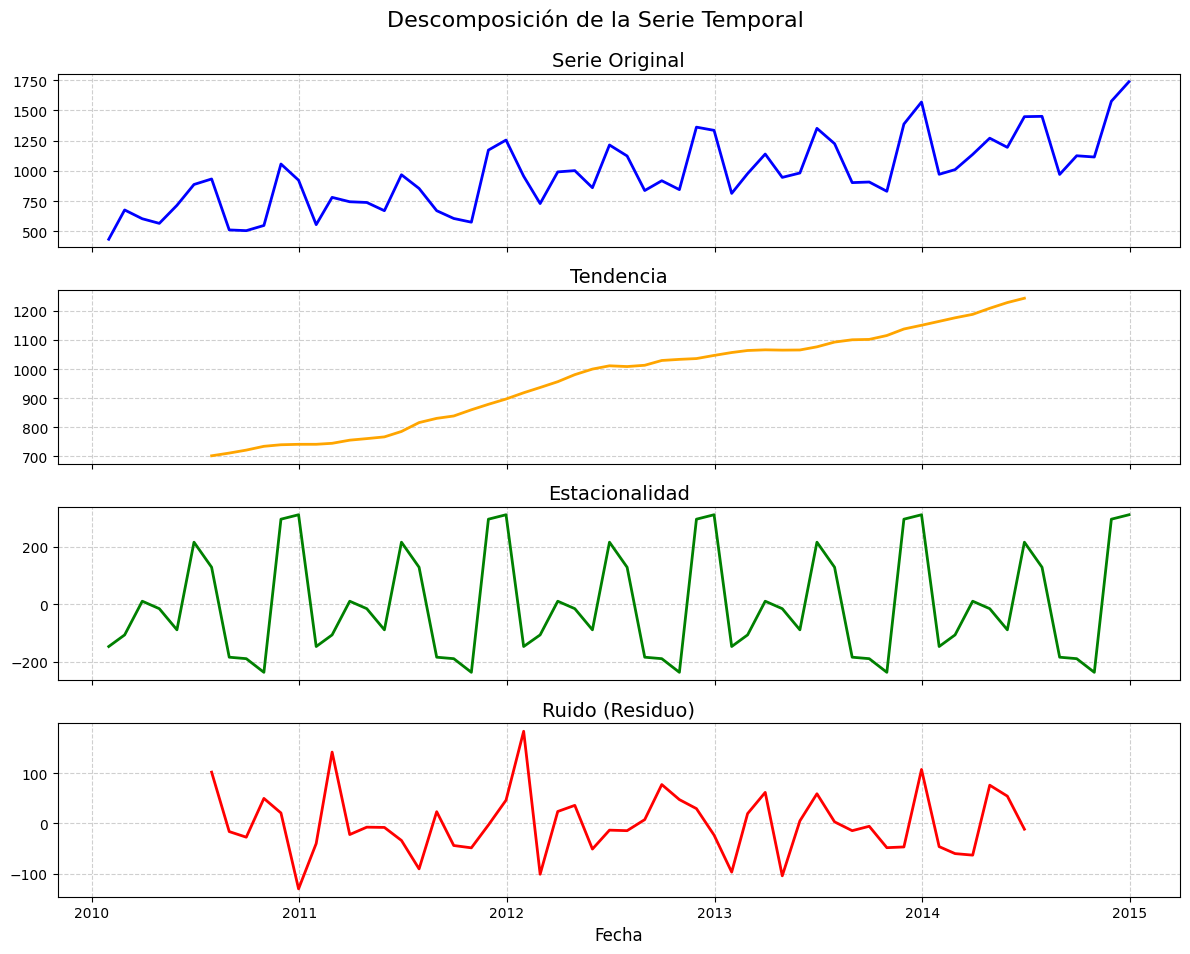

In [10]:
analisis_st.detectar_estacionalidad()

<Figure size 1200x1000 with 0 Axes>

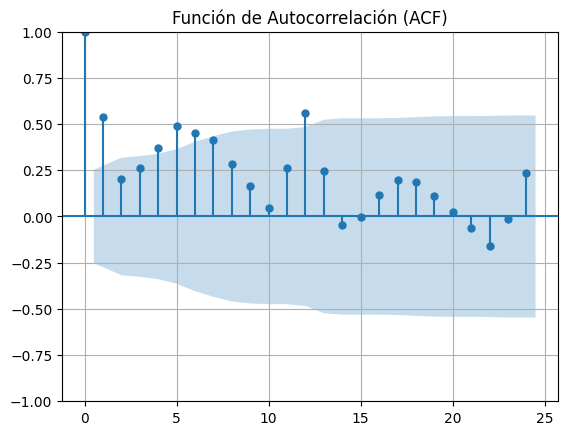

<Figure size 1200x1000 with 0 Axes>

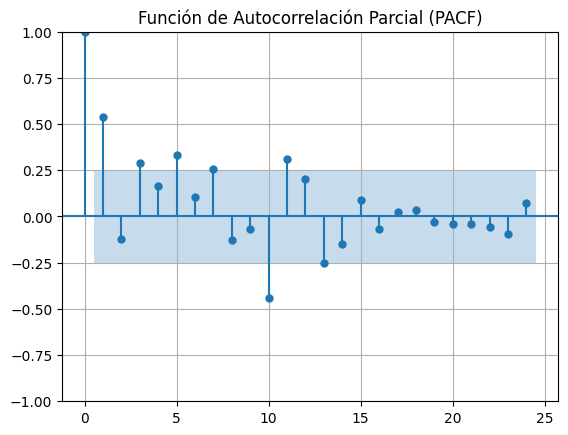

In [12]:
analisis_st.graficar_acf_pacf(lags=24)

## ARIMA

In [14]:
df_empleo = pd.read_csv('datos/solicitud_empleo.csv', parse_dates=True)

In [15]:
df_empleo.head()

,Date,Job_Applications,Job_Postings
0,2010-01-31,1025,486
1,2010-02-28,1013,504
2,2010-03-31,1072,487
3,2010-04-30,1136,494
4,2010-05-31,1068,564
